# Primeros pasos

Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import xgboost as xgb

Conectando google drive con google colab

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir ="/content/drive/MyDrive/Colab Notebooks/Analisis Industrial/LAB_06"
%cd $working_dir

/content/drive/MyDrive/Colab Notebooks/Analisis Industrial/LAB_06


In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Exploratory data

## Leyendo la data

In [ ]:
import os
# Directorio de datos
file_path = os.path.join(working_dir, 'train_FD001.txt')

# Agregar nombres para las columnas de sensor
column_names = ['unit_number', 'cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3']
column_names += [f'sensor_{i}' for i in range(1, 22)]

# Lectura de la data con delimitador de espacio y con lo nombres previamente definidos
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# Mostrar las primeras filas del DataFrame
df.head(15)

,unit_number,cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


## Gráfica de los valores de todos los sensores para el motor 1

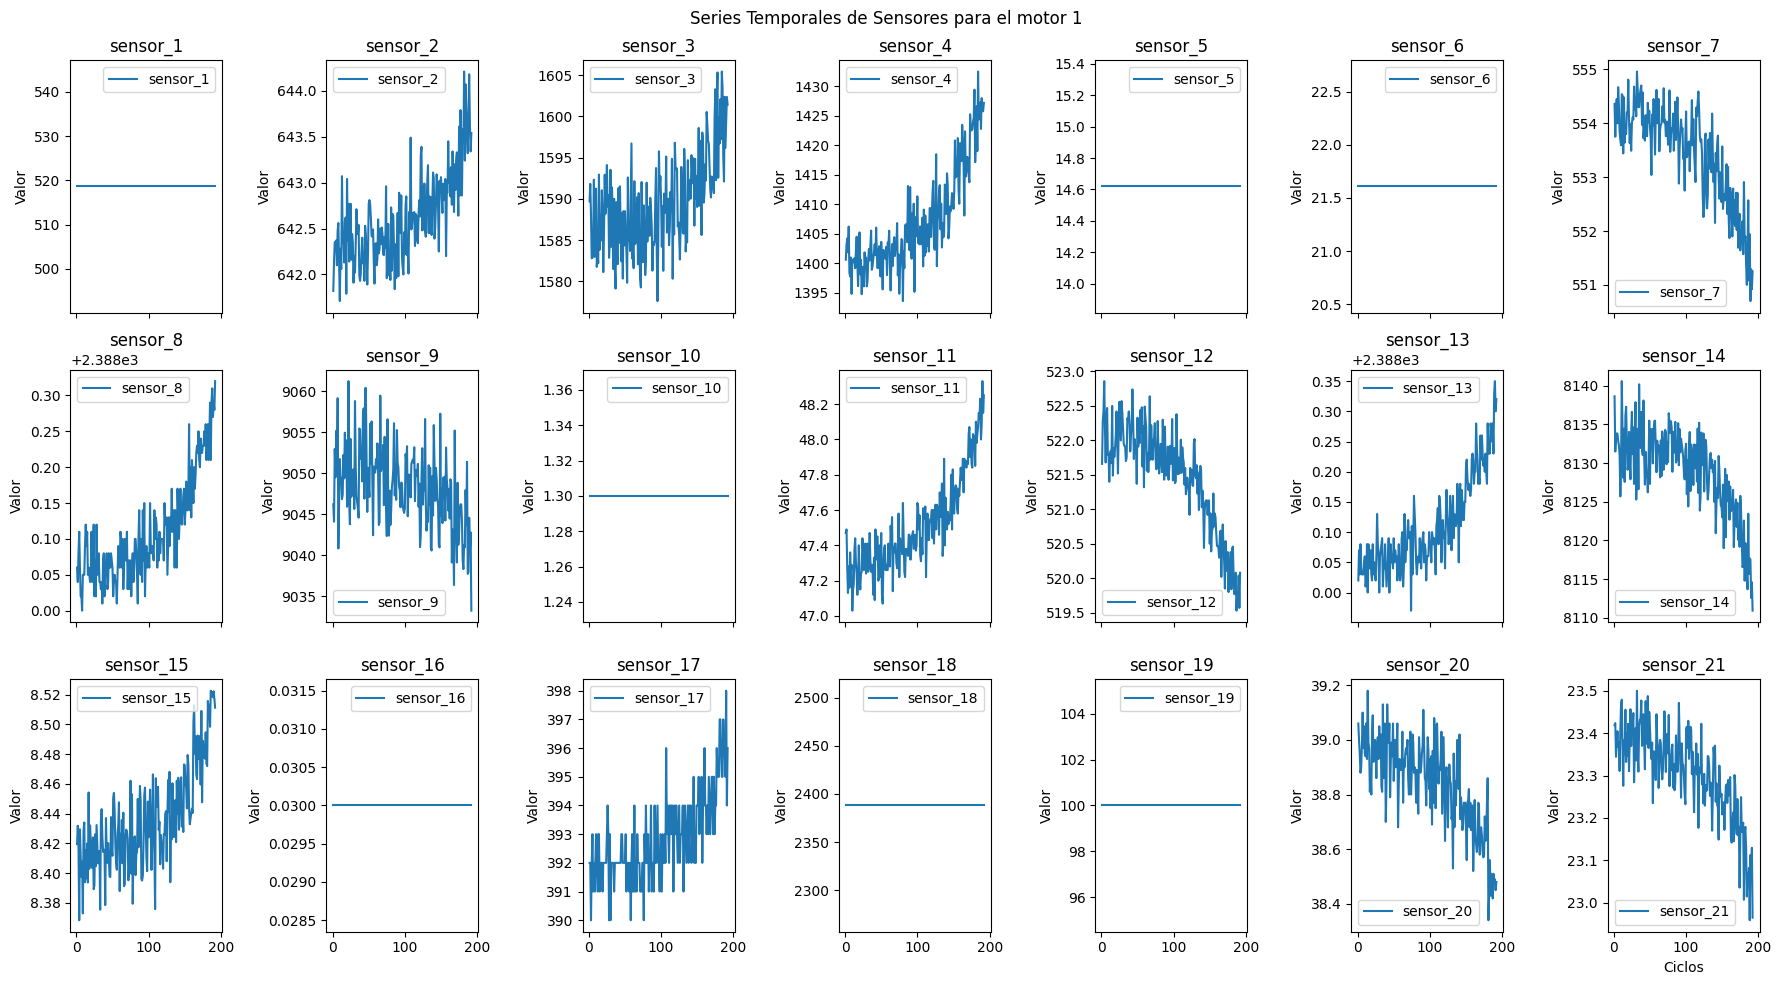

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para obtener solo las filas donde unit_number es igual a 1
df_unit_1 = df[df['unit_number'] == 1]

# Obtener las columnas que representan sensores (columnas desde 'sensor_1' hasta 'sensor_21')
sensor_columns = df.columns[df.columns.str.startswith('sensor_')]

# Configurar la disposición de subgráficos en una tabla de 3x7
num_rows = 3
num_cols = 7
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 10), sharex=True)

# Iterar sobre cada sensor y crear su gráfico correspondiente en la tabla
for i, sensor_col in enumerate(sensor_columns):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].plot(df_unit_1['cycles'], df_unit_1[sensor_col], label=sensor_col)
    axes[row, col].set_title(sensor_col)
    axes[row, col].set_ylabel('Valor')
    axes[row, col].legend()

# Configuración adicional de la tabla
plt.xlabel('Ciclos')
plt.suptitle('Series Temporales de Sensores para el motor 1', y=0.98)
plt.tight_layout()
plt.show()



>> **Podemos observar que los sensores 1, 5, 6, 10, 16 , 18 y 19 no varían con el pasar de los ciclos. ¿Esto se repetirá en todos los sensores? Lo comprobaremos en la siguiente sección**

## Gráfica de los valores de todos los sensores para todos los motores

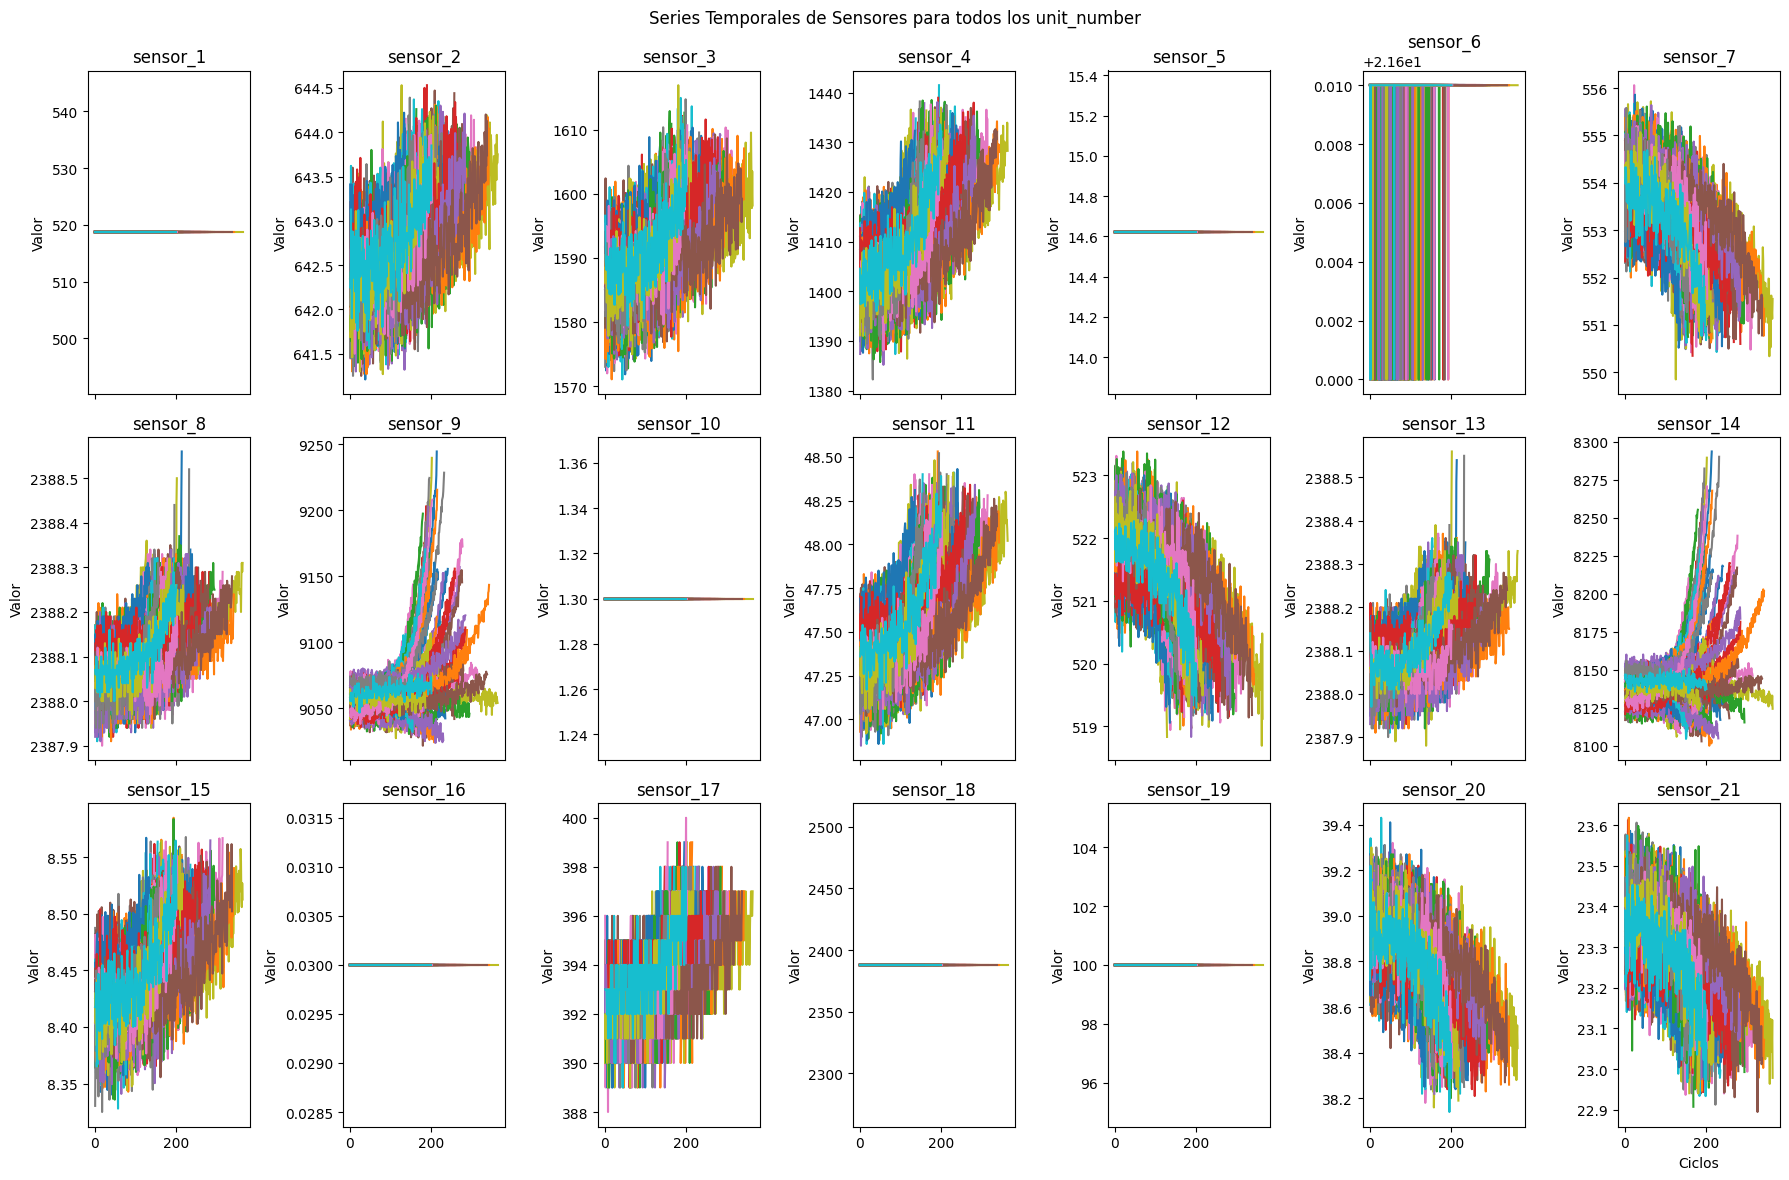

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener las columnas que representan sensores (columnas desde 'sensor_1' hasta 'sensor_21')
sensor_columns = df.columns[df.columns.str.startswith('sensor_')]

# Configurar la disposición de subgráficos en una matriz, 7 filas por 3 columnas
num_rows = 3
num_cols = 7

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 12), sharex=True)

# Iterar sobre cada partición de subgráficos y crear sus gráficos correspondientes
for row in range(num_rows):
    for col in range(num_cols):
        sensor_col = sensor_columns[row * num_cols + col]
        for unit_number in df['unit_number'].unique():
            df_unit = df[df['unit_number'] == unit_number]
            axes[row, col].plot(df_unit['cycles'], df_unit[sensor_col])
        axes[row, col].set_title(sensor_col)
        axes[row, col].set_ylabel('Valor')

# Configuración adicional de la matriz
plt.xlabel('Ciclos')
plt.suptitle('Series Temporales de Sensores para todos los unit_number', y=0.98)
plt.tight_layout()
plt.show()


>> **Efectivamente los sensores 1, 5, 6, 10, 16 , 18 y 19 no varían con el pasar de los ciclos para todos los motores. Eliminaremos a todos ellos ya que no tendrán relevancia para determinar el RUL**

## Eliminación de sensores innecesarios.

In [ ]:
# Lista de sensores a eliminar
sensores_a_eliminar = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

# Eliminar las columnas correspondientes a los sensores
df = df.drop(sensores_a_eliminar, axis=1)

# Mostrar las primeras filas del DataFrame actualizado
df.head()

,unit_number,cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


## Tratamiento de outliers

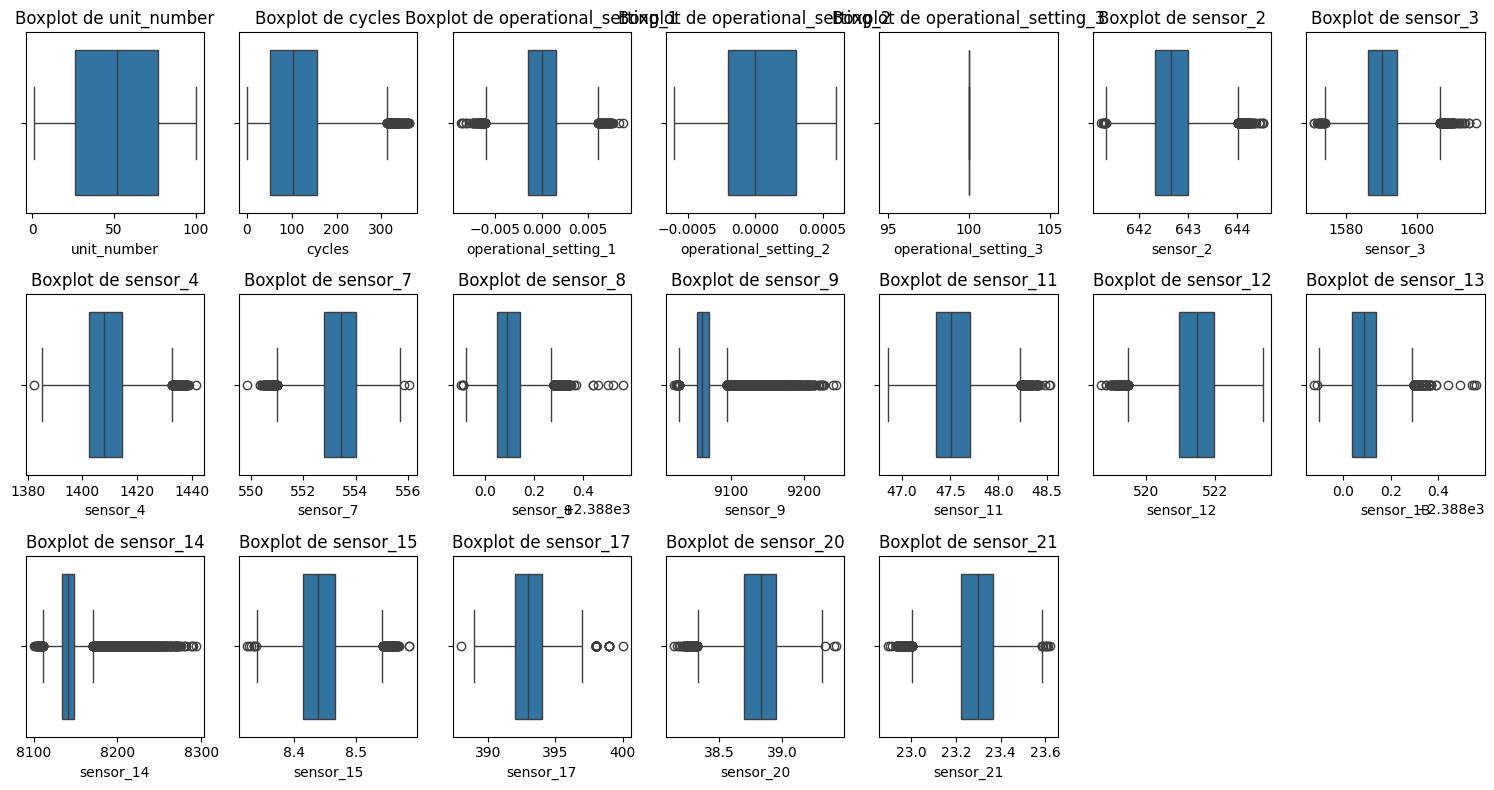

In [ ]:
# Análisis de outliers

plt.figure(figsize=(15, 8))

# Iterar sobre todas las columnas del DataFrame
for i, column in enumerate(df):
    plt.subplot(3, 7, i+1)  # 3 filas, 7 columnas (ajusta según el número de columnas)

    # Crear un boxplot para cada columna
    sns.boxplot(x=df[column])

    plt.title(f'Boxplot de {column}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

> Como se pueden ver en sus respectivos Box Plot, existen outliers en todos los sensores.

In [ ]:
# Creación de la variable data_conOutlier y una variable data_sinOutlier que es una copia del dataframe original
data_sinOutlier = df.copy()
data_conOutlier = {}

In [ ]:
# Almacenamos en data_conOutlier todas las filas de data_SPI que como mínimo tienen valores atípicos en al menos una de las columnas especificadas

for columna in df[['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']
].columns:
  # Las filas que cumple con la condición en la columna actual son agregadas se añaden al data_conOutlier
  # Con el drop_duplicates, se elimina las filas duplicadas que pueda haberse agregado en iteraciones anteriores
  data_conOutlier = pd.DataFrame(data_conOutlier).append(df[ (df[columna] < np.percentile(df[columna].copy(),2.5)) |
                                                                (df[columna] > np.percentile(df[columna].copy(),97.5)) ]).drop_duplicates()
  print(data_conOutlier.shape)

(994, 19)
(1855, 19)
(2537, 19)
(3073, 19)
(3463, 19)
(4104, 19)
(4402, 19)
(4691, 19)
(4871, 19)
(5049, 19)
(5344, 19)
(5629, 19)
(5849, 19)
(6073, 19)


<ipython-input-109-b69645482157>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_conOutlier = pd.DataFrame(data_conOutlier).append(df[ (df[columna] < np.percentile(df[columna].copy(),2.5)) |
<ipython-input-109-b69645482157>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_conOutlier = pd.DataFrame(data_conOutlier).append(df[ (df[columna] < np.percentile(df[columna].copy(),2.5)) |
<ipython-input-109-b69645482157>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_conOutlier = pd.DataFrame(data_conOutlier).append(df[ (df[columna] < np.percentile(df[columna].copy(),2.5)) |
<ipython-input-109-b69645482157>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
data_conOutlier.shape

(6073, 19)

> Existen 6073 filas que como mínimo tienen valores atípicos en al menos una de las variables numéricas

In [ ]:
# El total de filas del dataframe
df.shape

(20631, 19)

In [ ]:
# Porcentaje que representa las filas de la data_conOutlier con respecto al total
data_conOutlier.shape[0]/df.shape[0]*100


29.436285201880665

> **Cerca del 30% de los datos contienen valores atípicos en al menos una de las variables numéricas. Eliminarlas podría resultar en la pérdida de un gran porcentaje del total.**

> **Se procederá a reemplazarlos por sus respectivos límites (lower_bound si están por debajo y upper_bound si están por encima).**

In [ ]:
# Lista de sensores para aplicar el tratamiento
sensores_a_tratar = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

# Iterar sobre cada columna de los sensores a tratar
for columna in df[sensores_a_tratar].columns:
    # Hacemos una copia de los valores de la columna actual
    data = df[columna].copy()
    # Calculamos su mínimo y máximo
    lower_bound = np.percentile(data, 2.5)
    upper_bound = np.percentile(data, 97.5)
    # Encontramos a los que se encuentran fuera del rango o sea los outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    # Reemplazamos los outliers de la columna actual por sus respectivos límites
    data.loc[outliers.index] = np.clip(data.loc[outliers.index], lower_bound, upper_bound)
    # Asignamos los valores corregidos a la columna original en el DataFrame
    df[columna] = data

# Verificación de los cambios
print(df.head())


   unit_number  cycles  operational_setting_1  operational_setting_2  \
0            1       1                -0.0007                -0.0004   
1            1       2                 0.0019                -0.0003   
2            1       3                -0.0043                 0.0003   
3            1       4                 0.0007                 0.0000   
4            1       5                -0.0019                -0.0002   

   operational_setting_3  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  \
0                  100.0    641.82   1589.70   1400.60    554.36   2388.06   
1                  100.0    642.15   1591.82   1403.14    553.75   2388.04   
2                  100.0    642.35   1587.99   1404.20    554.26   2388.08   
3                  100.0    642.35   1582.79   1401.87    554.45   2388.11   
4                  100.0    642.37   1582.85   1406.22    554.00   2388.06   

   sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  sensor_17  \
0   9046.19      

## Tratamiento de valores nulos

In [ ]:
# Utilizamos la función para calcular valores nulos de 'data_sinOutlier'
missing_values_table(data_sinOutlier)

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


> **No hay valores nulos**

##Crear columna Remaining Useful Life

In [ ]:
# Crear la columna RUL
df['RUL'] = df['cycles'].groupby(df['unit_number']).transform(lambda x: x.max() - x)

In [ ]:
# Comprobamos observando los valores de RUL para el motor 3

df_unit_1 = df[df['unit_number'] == 3]

# Mostrar el DataFrame filtrado
df_unit_1


,unit_number,cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
479,3,1,0.0008,0.0005,100.0,642.0400,1584.2000,1398.1300,553.96,2388.06,9056.9500,47.14,522.24,2388.00,8138.4000,8.4207,391.00,38.96,23.320500,178
480,3,2,-0.0010,0.0000,100.0,642.6600,1587.0400,1398.6200,554.76,2388.05,9059.6700,47.35,522.03,2388.01,8137.3800,8.3949,391.00,39.07,23.436900,177
481,3,3,0.0013,-0.0002,100.0,642.0700,1580.7500,1401.1000,554.51,2388.03,9050.4300,47.10,522.16,2388.01,8137.2000,8.3820,393.00,39.03,23.316200,176
482,3,4,0.0008,-0.0002,100.0,642.5000,1580.1200,1395.7600,554.48,2388.07,9060.4300,47.44,522.31,2388.07,8139.3500,8.3940,391.00,38.94,23.479825,175
483,3,5,0.0020,0.0004,100.0,641.9700,1581.4800,1394.0500,554.14,2388.01,9054.3600,47.16,522.00,2388.03,8135.9900,8.4233,391.00,38.90,23.419000,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,3,175,-0.0030,0.0004,100.0,643.1500,1603.6725,1424.1700,551.47,2388.06,9131.7575,48.12,520.34,2388.14,8199.8725,8.5066,396.00,38.49,23.057575,4
654,3,176,-0.0008,0.0002,100.0,643.7425,1595.6100,1428.6425,551.93,2388.18,9131.7575,47.98,520.91,2388.12,8199.8725,8.5234,396.00,38.49,23.065600,3
655,3,177,-0.0041,-0.0002,100.0,643.6800,1601.2100,1423.5000,552.17,2388.13,9131.7575,48.10,520.19,2388.16,8199.8725,8.5234,396.25,38.43,23.057575,2
656,3,178,-0.0010,0.0001,100.0,643.6600,1603.6725,1428.6425,551.45,2388.19,9131.7575,48.13,520.14,2388.12,8199.8725,8.5234,396.25,38.57,23.132300,1


# Modeling

## Estableciendo las variables independientes y dependientes

In [ ]:
df.columns

Index(['unit_number', 'cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_2',
       'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_20', 'sensor_21', 'RUL'],
      dtype='object')

In [ ]:
# Columnas a excluir de X
exclude_columns = ['unit_number', 'cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3','RUL']

# Obtener X excluyendo las columnas especificadas
X = df.drop(columns=exclude_columns)

# Seleccionar la columna para Y ('Crack length (mm)')
y = df['RUL']


## Considerando unit_number [1-20] como test y [21-100] como training.

In [ ]:
from sklearn.model_selection import train_test_split

# Definir máscaras para filtrar unit_numbers
test_mask = (df['unit_number'] >= 1) & (df['unit_number'] <= 20)
train_mask = (df['unit_number'] > 20)

# Filtrar conjuntos de entrenamiento y prueba según las máscaras
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

## Entrenamiento

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
import numpy as np

# Crear e entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=1000, random_state=42)
xgb_model.fit(X_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Evaluar modelo (RMSE) y compararlo con baseline de valor constante (media)

In [ ]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)
# Compute and print the RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE para XGBoost: {rmse_xgb}")

# Baseline: Utilizar la media como predicción constante
y_pred_baseline = np.full_like(y_test, np.mean(y_train))

# Calcular el RMSE para el baseline
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
print(f"RMSE para el Baseline (media): {rmse_baseline}")

RMSE para XGBoost: 41.603309002282685
RMSE para el Baseline (media): 66.62588743993815


> **El valor RSME para el Baseline (media) es mayor al RSME del modelo XGBoost que realizamos. Eso significa que existe menor error que en el baseline y con ello se demuestra que nuestro modelo sí está prediciendo.**

## Gráfica de Feature Importance

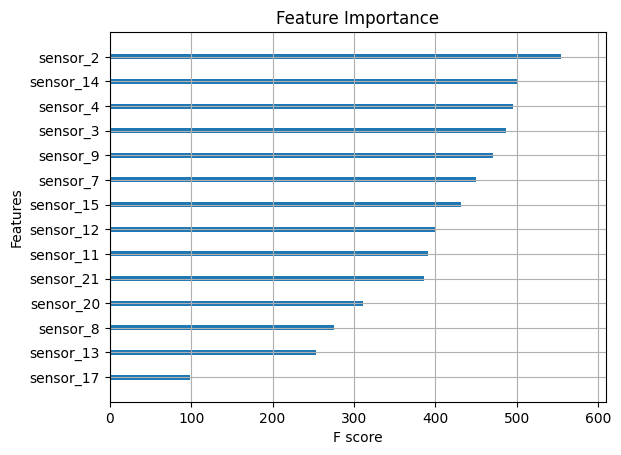

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Entrenar el modelo XGBoost (si aún no lo has hecho)
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Crear un gráfico de Feature Importance
xgb.plot_importance(xgb_model, importance_type='weight', show_values=False, title='Feature Importance')
plt.show()


> Acá podemos observar los sensores que tienen mayor importancia en nuestro modelo

# Optimización de hiperparámetros

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100, step=10),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'random_state': 42
    }

    # Initialize XGBoost regressor with the suggested hyperparameters
    model = xgb.XGBRegressor(objective='reg:squarederror', **params)

    # Fit the regressor to the training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute and return the root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Run optimization
study = optuna.create_study(direction='minimize') # minimize porque queremos que baje el RMSE
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Initialize XGBoost regressor with the best parameters
best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

# Fit the regressor to the training set
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

[I 2024-03-01 01:57:07,150] A new study created in memory with name: no-name-b7376409-45c4-4bce-9494-22aaf688c052
<ipython-input-124-a2273289027c>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2024-03-01 01:57:07,740] Trial 0 finished with value: 41.97107266601576 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.009622623829501076}. Best is trial 0 with value: 41.97107266601576.
<ipython-input-124-a2273289027c>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2024-03-01 01:57:08,849] Trial 1 fi

Best parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.0538664761376592}
RMSE: 35.150890


> **El RMSE es 35.15 y la combinación de mejores hyperparámetros {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.0538664761376592}.**

> **Con esta mejor combinación, el error ha vuelto ha disminuir. Por lo tanto, se ha optimizado correctamente.**

In [ ]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

> **Por la forma de la gráfica, se observa que el modelo está aprendiendo, es una optimización bayesiana.**